Задача "Леденцы".

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [61]:
df = pd.read_csv('Леденцы.dat', sep=';')

V1: Я потребляю леденцы, чтобы освежить дыхание

V2: Я потребляю леденцы, чтобы чувствовать себя увереннее

V3: Я потребляю леденцы, чтобы освежить полость рта

V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту

V5: Я потребляю леденцы как заменитель других кондитерских изделий

V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого

V7: Леденцы помогают мне сконцентрироваться

V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать

V9: Я потребляю леденцы для того, чтобы облегчить боль в горле

V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа

V11: Я потребляю леденцы для улучшения самочувствия


Кластеры:
1. люди, употребляющие леденцы в качестве сладости (вопросы 5, 6)
2. люди, употребляющие леденцы для лечения (вопросы 9, 10, 11)
3. люди, употребляющие леденцы для освежения дыхания (вопросы 1, 3, 4)
4. люди, употребляющие леденцы по ментальным причинам (вопросы 2, 7, 8)

In [62]:
model = AgglomerativeClustering(
    n_clusters=4, linkage="ward"
)
df['cluster'] = model.fit_predict(df)
print(silhouette_score(df, model.labels_))

0.7485964627274347


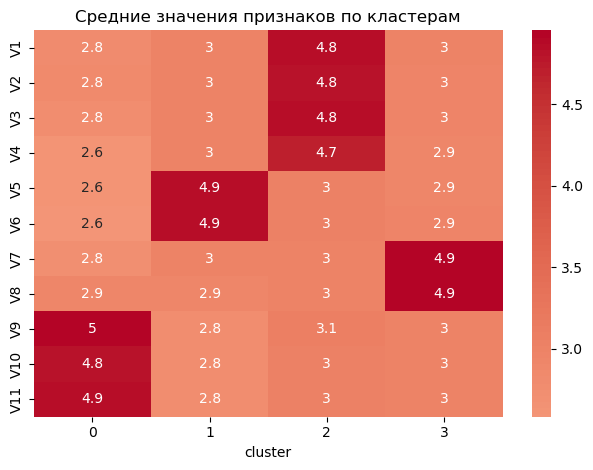

In [63]:
cluster_means = df.groupby('cluster').mean()
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', center=0)
plt.title('Средние значения признаков по кластерам')
plt.tight_layout()
plt.show()

В целом, наше предположение об интерпретации кластеров подтверждается, только высокие значения признака V2 больше характерны не для кластера 4, а для кластера 3.

Построим график зависимости silhouette_score от числа кластеров:

100%|██████████| 9/9 [00:00<00:00, 204.27it/s]


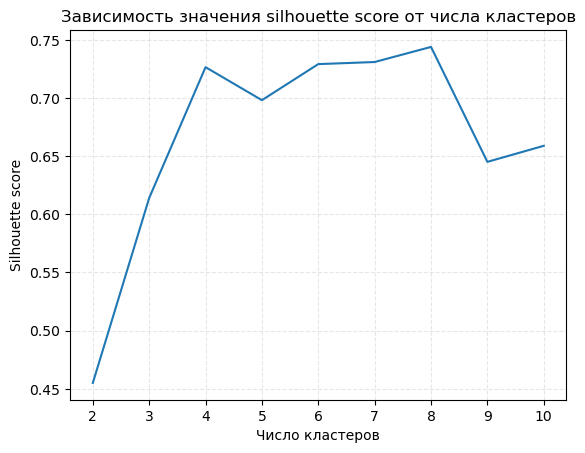

In [64]:
n_clusters = [i for i in range(2, 11)]
scores = []
df = df.drop(['cluster'], axis=1)

for i in tqdm(n_clusters):
    model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    model.fit(df)
    scores.append(silhouette_score(df, model.labels_))

plt.plot(n_clusters, scores)
plt.title('Зависимость значения silhouette score от числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Дендрограмма:

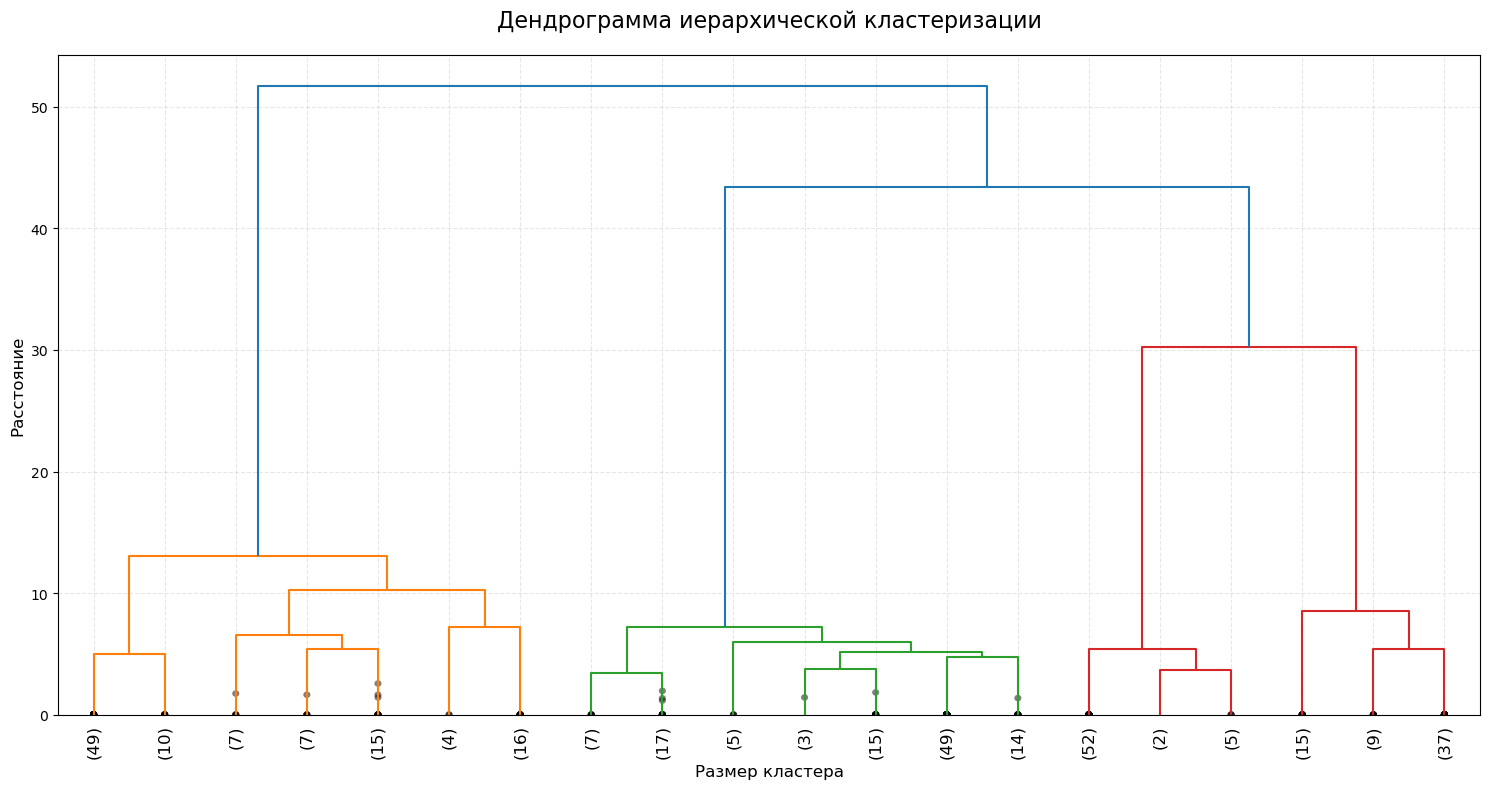

In [65]:
plt.figure(figsize=(15, 8))

Z = linkage(df, method='ward', metric='euclidean')

dendrogram(Z,
           truncate_mode='lastp',
           p=20, 
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=12,
           show_contracted=True)

plt.title('Дендрограмма иерархической кластеризации', fontsize=16, pad=20)
plt.xlabel('Размер кластера', fontsize=12)
plt.ylabel('Расстояние', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

100%|██████████| 9/9 [00:00<00:00, 117.83it/s]


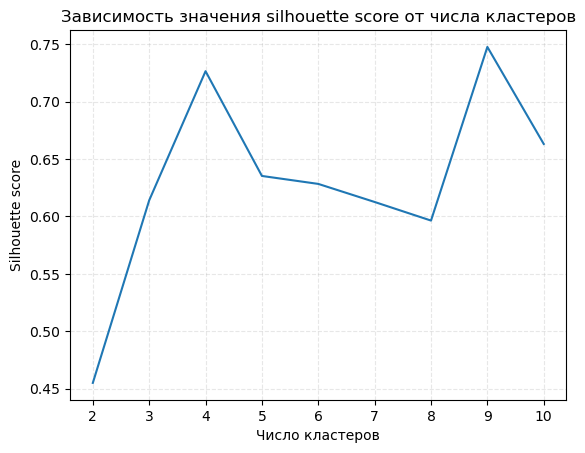

In [66]:
n_clusters = [i for i in range(2, 11)]
scores = []

for i in tqdm(n_clusters):
    model = KMeans(n_clusters=i)
    model.fit(df)
    scores.append(silhouette_score(df, model.labels_))

plt.plot(n_clusters, scores)
plt.title('Зависимость значения silhouette score от числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette score')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [67]:
model = DBSCAN()
df['cluster'] = model.fit_predict(df)
print(f'Число кластеров = {df['cluster'].unique().shape[0]}')
print(f'Silhouette score = {silhouette_score(df, model.labels_)}')

Число кластеров = 15
Silhouette score = 0.8152037610225183


In [68]:
for cluster in sorted(list(df['cluster'].unique())):
    n_elements = df[df['cluster'] == cluster].shape[0]
    print(f'Число элементов в кластере {cluster}: {n_elements}')

Число элементов в кластере -1: 60
Число элементов в кластере 0: 10
Число элементов в кластере 1: 5
Число элементов в кластере 2: 49
Число элементов в кластере 3: 12
Число элементов в кластере 4: 9
Число элементов в кластере 5: 49
Число элементов в кластере 6: 15
Число элементов в кластере 7: 10
Число элементов в кластере 8: 6
Число элементов в кластере 9: 37
Число элементов в кластере 10: 10
Число элементов в кластере 11: 5
Число элементов в кластере 12: 9
Число элементов в кластере 13: 52
